# Classification. Linear models and KNN

In [47]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import set_config

In [49]:
set_config(display='diagram')

## Part 1: Titanic survival prediction

### Dataset

Read the description here: https://www.kaggle.com/c/titanic/data. Download the dataset and place it in the *data/titanic/* folder in your working directory.
You will use train.csv for model training and validation. The test set is used for model testing: once the model is trained, you can predict whether a passenger survived or not for each passenger in the test set, and submit the predictions: https://www.kaggle.com/c/titanic/overview/evaluation.  


In [50]:
PATH = "./data/"

In [51]:
data = pd.read_csv(os.path.join(PATH, 'titanic', 'train.csv')).set_index('PassengerId')

In [52]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.shape

(891, 11)

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

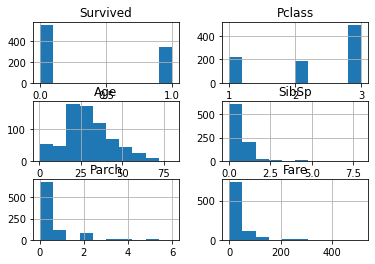

In [9]:
data.hist()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### EDA

**(0.5 points)** How many females and males are there in the dataset? What about the survived passengers? Is there any relationship between the gender and the survival?

In [11]:
## your codee
data.groupby('Sex')['Survived'].count()# используем этот признак для счета , т.к. он заполнен у всех пассажиров в датасете

Sex
female    314
male      577
Name: Survived, dtype: int64

In [12]:
##  видно, что в датасете мужчин больше
##  проверим распределение среди выживших и среди погибших
surv_t = data[data['Survived'] == 1] #true
surv_f = data[data['Survived'] == 0] #false

In [13]:
#распределение среди выживших
surv_t.groupby('Sex')['Survived'].count()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [14]:
#распределение среди погибших
surv_f.groupby('Sex')['Survived'].count()

Sex
female     81
male      468
Name: Survived, dtype: int64

In [33]:
print(data.groupby(["Pclass", "Sex"])["Survived"].value_counts(normalize=True))

Pclass  Sex     Survived
1       female  1           0.968085
                0           0.031915
        male    0           0.631148
                1           0.368852
2       female  1           0.921053
                0           0.078947
        male    0           0.842593
                1           0.157407
3       female  0           0.500000
                1           0.500000
        male    0           0.864553
                1           0.135447
Name: Survived, dtype: float64


для данного датасета видно ,что в выборке значительно больше мужчин, поэтому поставить однозначное соответствие между полом и выживанием не верно
учитывая на основе каких событий составлен этот датасет, логично предположить, что в первую очереь спасали женшин и шлюпок и мест в них было огранеиченоое количество, значит женщине выжить в этой ситуации было более вероятным

**(0.5 points)** Plot age distribution of the passengers. What is the average and the median age of survived and deceased passengers? Do age distributions differ for survived and deceased passengers? Why?

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

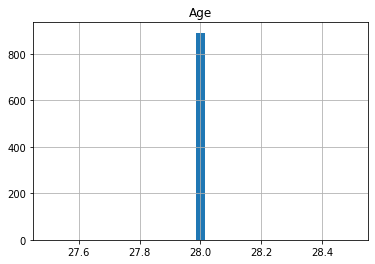

In [38]:
# age distribution of the passenger
data.hist(column = 'Age', bins = 33)

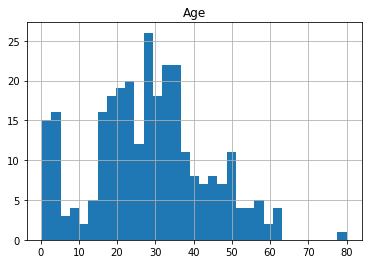

In [16]:
##посмотрим распределение по возрасту среди выживших
##data.groupby('Survived').hist(column='Age', bins=33)
surv_t.hist(column = 'Age', bins = 33)
plt.show()

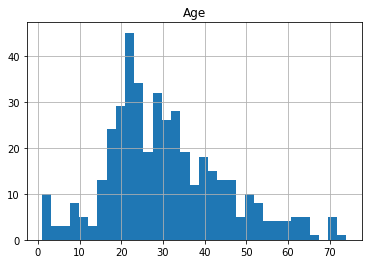

In [17]:
#среди погибших
surv_f.hist(column = 'Age', bins = 33)
plt.show()

In [18]:
## your code
surv_t['Age'].median()

28.0

In [19]:
## your code
surv_f['Age'].median()

28.0

In [20]:
## your code
surv_t['Age'].mean()

28.343689655172415

In [21]:
## your code
surv_f['Age'].mean()

30.62617924528302

In [22]:
data.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

< your thoughts >
вероятнее всего, более старшие люди занимали более весомое положение в обществе и путешествовали более высоким классом, которые спасали в первую очередь, а также сажали в шлюпки в первую очередь своих мам и бабушек.
среди выживших максимум находтся в районе 28 лет, среди погибших - 21 год. вероятнее всего, молодые люди в поисках лучшей новой жизни отправились в новый свет 3 классом ,спастись у которого было меньше всего шансов.

**(1 point)** Explore "passenger class" and "embarked" features. What class was "the safest"? Is there any relationship between the embarkation port and the survival? Provide the corresponding visualizations.

In [23]:
## рассмотрим распределение по классам
data.groupby('Pclass')['Survived'].count()

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [24]:
# очевидно, что пассажиров 3го класса больше, чем 1 и 2 вместе взятого
# попробуем посмотреть в процентном соотношении для выживших
surv_t.groupby('Pclass')['Survived'].count() / data.groupby('Pclass')['Survived'].count()*100 # %

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [25]:
# соотношение для погибших
surv_f.groupby('Pclass')['Survived'].count() / data.groupby('Pclass')['Survived'].count()*100 # %

Pclass
1    37.037037
2    52.717391
3    75.763747
Name: Survived, dtype: float64

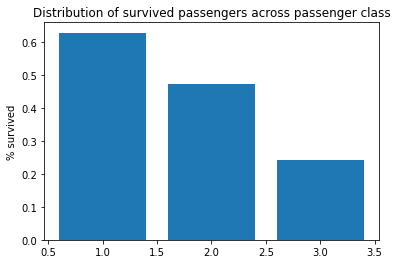

In [26]:
distr_c = surv_t.groupby('Pclass').count().max(axis=1)[[1, 2, 3]] / data.groupby('Pclass')['Survived'].count()

plt.bar(distr_c.index, distr_c.values)
plt.ylabel('% survived')
plt.title('Distribution of survived passengers across passenger class')
plt.show()

In [27]:
#data.pivot_table( 'Pclass', 'Survived').plot(kind='bar', stacked=True)

In [28]:
# очевидно, что 1 класс безопаснне для данного путешествия
# число пассажиров в каждом из портов посадки
data.groupby('Embarked')['Survived'].count()

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64

In [29]:
# соотношение среди выживших по порту посадки
surv_t.groupby('Embarked')['Survived'].count() / data.groupby('Embarked')['Survived'].count()*100 # %

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

In [30]:
# соотношение по порту посадки среди погибших
surv_f.groupby('Embarked')['Survived'].count() / data.groupby('Embarked')['Survived'].count()*100 # %

Embarked
C    44.642857
Q    61.038961
S    66.304348
Name: Survived, dtype: float64

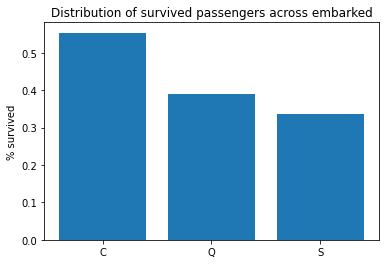

In [31]:
distr_e = surv_t.groupby('Embarked').count().max(axis=1)[['C', 'Q', 'S']] / data.groupby('Embarked')['Survived'].count()

plt.bar(distr_e.index, distr_e.values)
plt.ylabel('% survived')
plt.title('Distribution of survived passengers across embarked')
plt.show()

Очевидно, что доля выживших пассажиров 1 и 2го клааса выше, чем пасажиров 3го класса.
что касается порта отправления, то основные пассажиры сели на борт в порту S(Southampton), так что доля погибших из этого порта выше

### Modelling

**(0.5 points)** Find the percentage of missing values for each feature. 

In [32]:
## your code
from tabulate import tabulate

top = 11 # all columns
print(tabulate(
    sorted(list(zip(data.columns, data.isnull().sum(), data.isnull().sum() / data.shape[0] * 100)), key=lambda x: -x[2])[:top], 
    headers=['col_name', 'null_cnt', 'null_perc']))

col_name      null_cnt    null_perc
----------  ----------  -----------
Cabin              687    77.1044
Age                177    19.8653
Embarked             2     0.224467
Survived             0     0
Pclass               0     0
Name                 0     0
Sex                  0     0
SibSp                0     0
Parch                0     0
Ticket               0     0
Fare                 0     0


Think about the ways to handle these missing values for modelling and write your answer below. Which methods would you suggest? What are their advantages and disadvantages?

 очевидно, что 2 отсутствующих значения порта отправления ни на что не повлияют, и  их можно смело отбросить, 2 значения из 891 ничего не изменят, либо подставить туда значение саого большего по числу пассажиров порт.
 
 77% отсутствующих значений каюты врятли несут полезную информацию, в целом фичю можно просто игнорировать при  моделировааниии, хотя расселение по палубам было в соответсвии с классом пассажира, так что класс пассажира можно косвенно считать аналогиным показателем в плане предсказания вероятности.
 
 почти 20% отсутствующих значений возраста, вероятнее всего прийдется заполнить средним значением. 
 

**(1.5 points)** Prepare the features and train two models (KNN and Logistic Regression) to predict the survival. Compare the results. Use accuracy as a metric. Don't forget about cross-validation!

In [53]:
#preparing data
# 
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
data.Embarked[data.Embarked.isnull()] = 'S'
#data.Age[data.Age.isnull()] = 25 #data.Age.mean()

<ipython-input-53-87a179bb78e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Embarked[data.Embarked.isnull()] = 'S'


In [37]:
#data.Age = data.Age.median()


891

In [10]:
y = data['Survived']

In [11]:
## your code

In [ ]:
'''

target = 'Dribbling'
for feat in features:
    data.fillna({feat: data[feat].mean()}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data[features].values, data[target].values, train_size=0.8, random_state=2)
'''

**(0.5 + X points)** Try more feature engineering and hyperparameter tuning to improve the results. You may use either KNN or Logistic Regression (or both).

In [12]:
## your code

Load the test set and make the predictions. Submit them to kaggle and see the results :)
Select the best model, load the test set and make the predictions. Submit them to kaggle.

**Note**. X points will depend on your kaggle leaderboard score.
$$ f(score) = 0.5, \ \ 0.76 \leq score < 0.78,$$
$$ f(score) = 1.0, \ \ 0.78 \leq score < 0.81,$$ 
$$ f(score) = 2.5, \ \ 0.81 \leq score $$ 
Your code should generate the output submitted to kaggle. Fix random seeds to make the results reproducible.

In [13]:
## your code

## Part 2: Porto Seguro’s Safe Driver Prediction

Let's build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year.
Read the detailed description and download the dataset https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data. Put the data into *./data/porto/*.

In [14]:
insurance_data = pd.read_csv(os.path.join(PATH, 'porto', 'train.csv')).set_index('id')

In [15]:
insurance_data.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


Let's skip EDA for now. We'll use SGDClassifier and build a simple baseline: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html.
Note that loss='log' gives logistic regression.

In [16]:
y = insurance_data['target']
X = insurance_data.drop(columns=['target'])

In [17]:
numeric_features = [column for column in X if not (column.endswith("cat") or column.endswith("bin"))]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = [column for column in X if (column.endswith("cat") or column.endswith("bin"))]
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SGDClassifier(loss='log', alpha=0.001, n_jobs=-1, random_state=14))])

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
clf = pipeline.fit(X_train, y_train)

We'll calculate the model accuracy:

In [20]:
accuracy_score(y_true=y_valid, y_pred=clf.predict(X_valid))

0.9631224658945812

Wow! Our model gets ~0.963 accuracy! But is it really good?...

Let's plot the confusion matrix and analyze the errors.

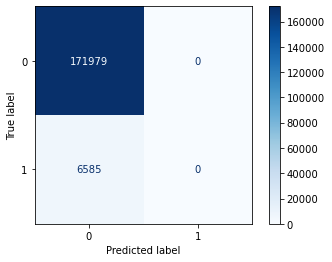

In [21]:
disp = plot_confusion_matrix(clf, X_valid, y_valid,
                             cmap=plt.cm.Blues,
                             normalize=None)

Well, it turns out that our model is completely useless. Let's calculate some basic statistics:

In [22]:
insurance_data.describe()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As you see, there are less than 4% of positive examples, so we have to deal with a highly imbalanced dataset.

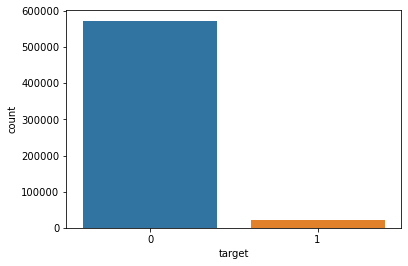

In [23]:
sns.countplot(x='target', data=insurance_data)
plt.show()

Accuracy is not informative here and the Normalized Gini Coefficient will be used instead: https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/overview/evaluation.

In [24]:
# Code for calculating Normalized gini coefficient
# https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703
def gini(actual, pred, cmpcol = 0, sortcol = 1):  
    assert(len(actual) == len(pred))  
    epsilon = 1e-7
    values = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)  
    values = values[np.lexsort((values[:, 2], -1 * values[:, 1]))]  
    total = values[:, 0].sum() 
    gini_sum = (values[:, 0].cumsum().sum() + epsilon) / (total + epsilon)  
  
    gini_sum -= (len(actual) + 1) / 2  
    return gini_sum / len(actual)  
  
def gini_normalized(a, p):  
    '''Function to calculate the normalized gini coefficient'''
    return gini(a, p) / gini(a, a)

**(1.5 points)** Prove that the **Normalized Gini Coefficient** is equivalent to **2 x AUC - 1** :

< your proof >

**(0.5 points)** By the way, what other metrics could you suggest for this problem?

< your thoughts >

Let's calculate the Normalized Gini Coefficient:

In [25]:
y_pred = clf.predict_proba(X_valid)[:, 1]

In [26]:
gini_normalized(y_valid, y_pred)

0.2558723581569817

**(0.5 points + Y bonus points)** Try different approaches: oversampling / undersampling, careful feature analysis and feature engineering, etc., to get a reasonable pipeline and improve the model quality. Use cross-validation for model evaluation.

Select the best model, load the test set and make the predictions. Submit them to kaggle.
Y bonus points will be calculated as $\frac{round(200 * \max(score - 0.253, 0))}{2}$, where *score* is your kaggle leaderboard score.

Note: do not use any classification models which have not been covered in the lessons yet.

In [27]:
## your code